# EE8603 Project - Predict quality of white wine

Lingling Zhang

Student ID: 501278404

#Install Pycaret

In [1]:
# install pycaret
!pip install pycaret[full]

In [7]:
# check installed version
import pycaret
pycaret.__version__

'3.2.0'

#Import packages

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load data

In [12]:
# link to data: https://archive.ics.uci.edu/dataset/186/wine+quality
!wget -q https://archive.ics.uci.edu/static/public/186/wine+quality/winequality-white.csv

In [15]:
!wget -q https://archive.ics.uci.edu/static/public/186/wine+quality.zip -O wine.zip

In [16]:
!unzip -q wine.zip

In [31]:
df = pd.read_csv('/content/winequality-white.csv',sep=';')
print(df.shape)
display(df.head())

(4898, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [32]:
df["quality"].unique()

array([6, 5, 7, 8, 4, 3, 9])

In [33]:
# from google.colab import drive
# drive.mount('/content/drive')

In [34]:
df_grp = df.groupby("quality").size()

df_grp_percent = pd.DataFrame(df_grp)
df_grp_percent.columns = ["count"]

df_grp_percent = df_grp_percent.reset_index()

df_grp_percent["percent"] = round(df_grp_percent["count"]/df.shape[0] * 100, 2)
df_grp_percent

,quality,count,percent
0,3,20,0.41
1,4,163,3.33
2,5,1457,29.75
3,6,2198,44.88
4,7,880,17.97
5,8,175,3.57
6,9,5,0.10


In [35]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [40]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [41]:
(df == 0).astype(int).sum()

fixed acidity            0
volatile acidity         0
citric acid             19
residual sugar           0
chlorides                0
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       0
sulphates                0
alcohol                  0
quality                  0
dtype: int64

## EDA

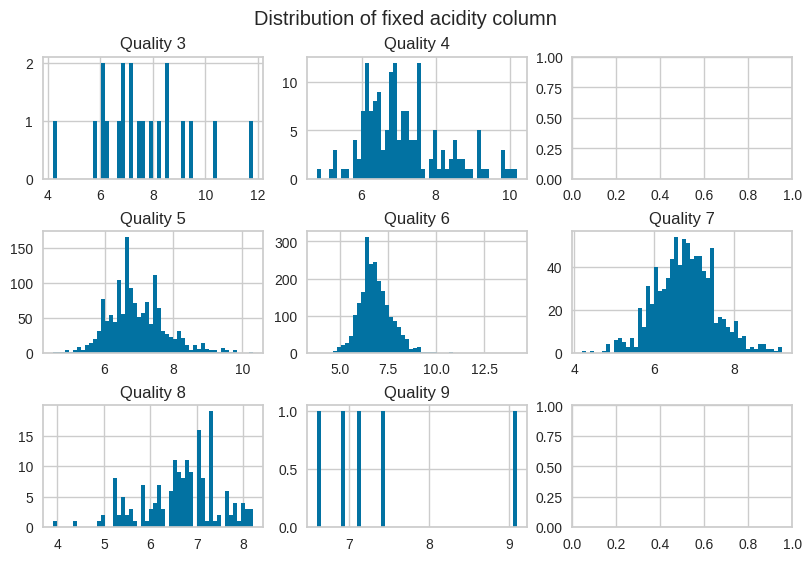

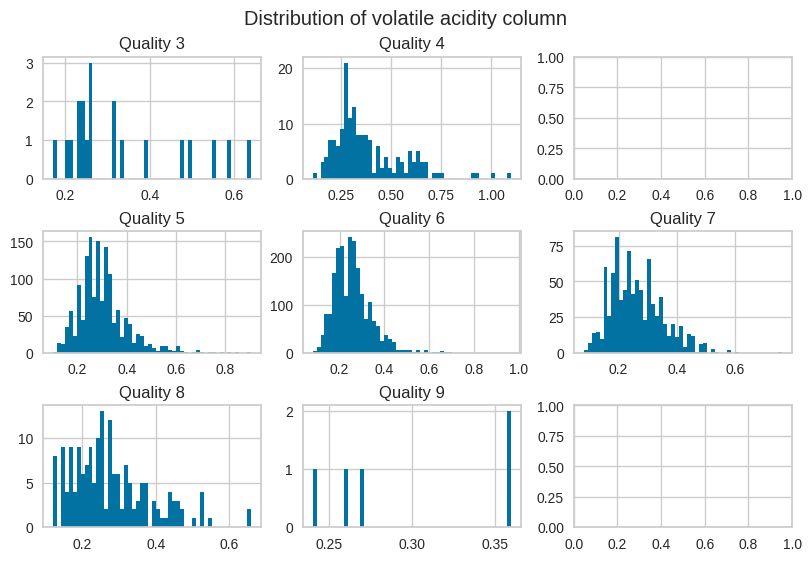

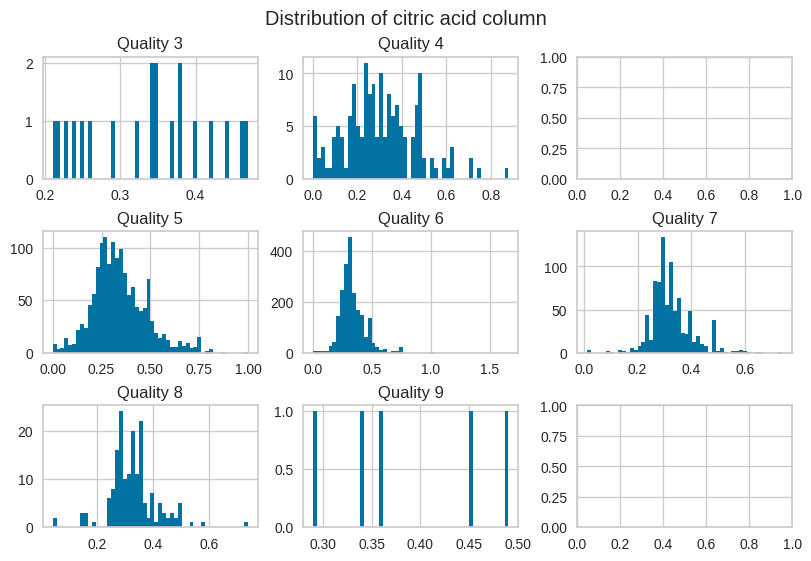

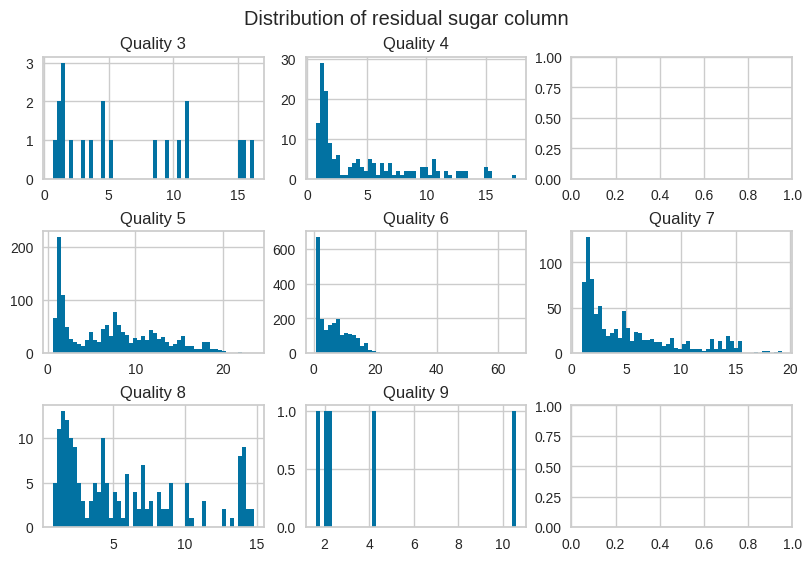

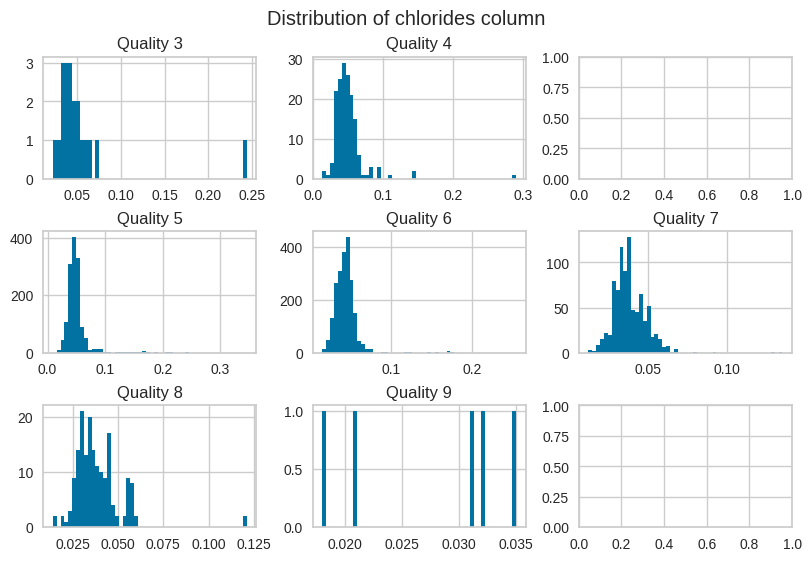

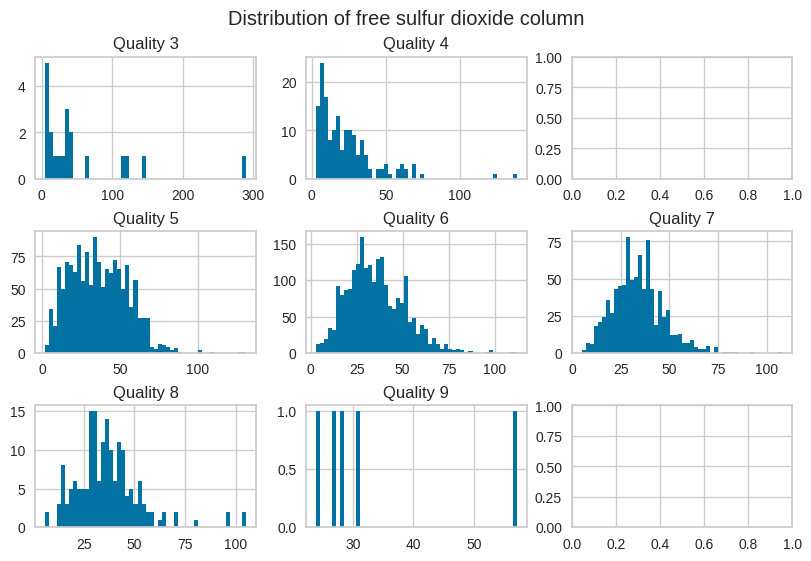

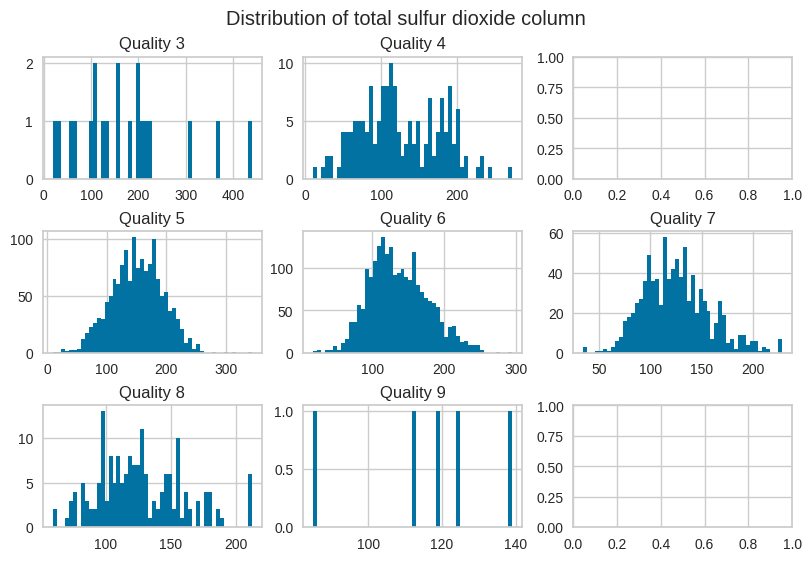

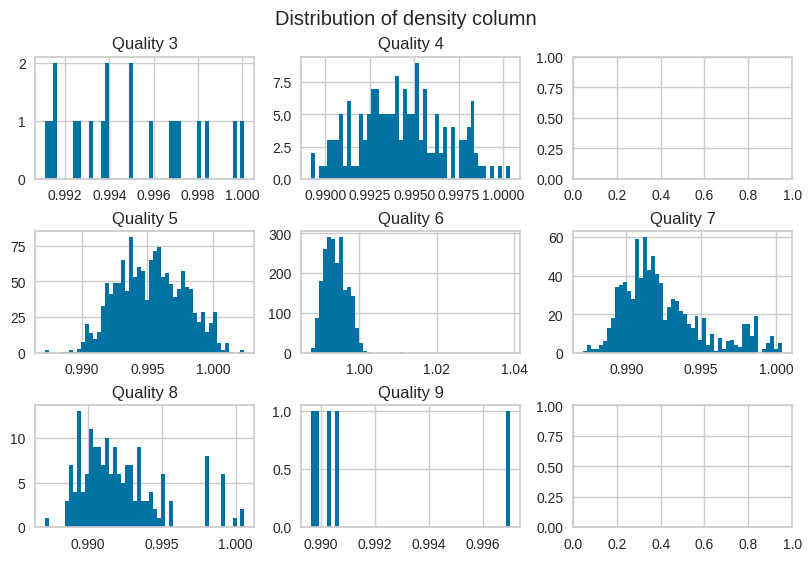

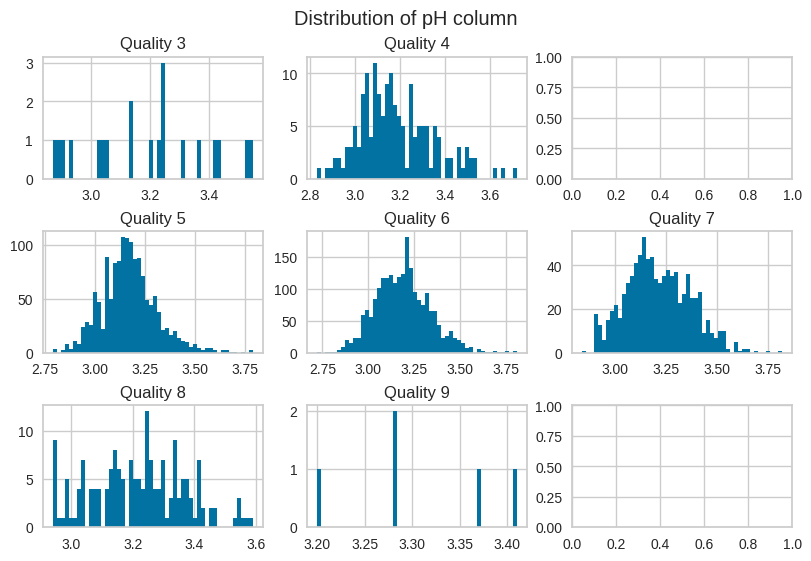

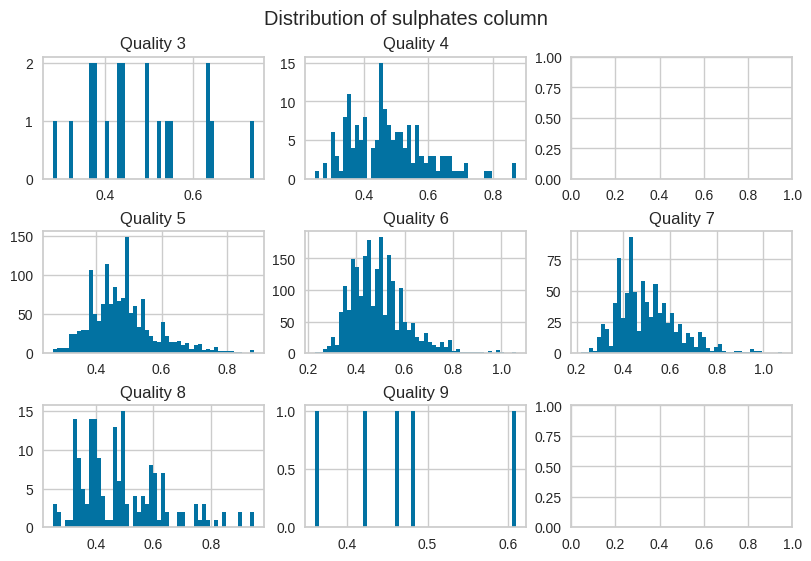

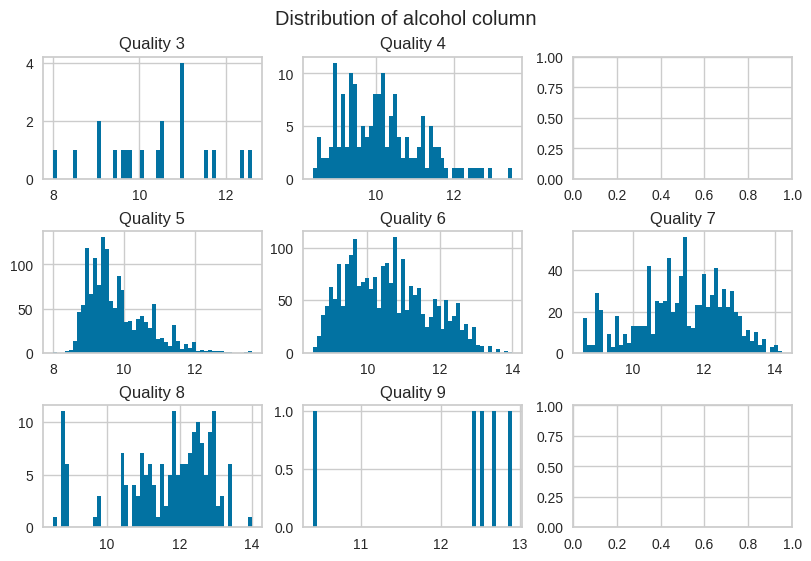

In [56]:
for c in df.columns:
    if c != "quality":
        fig, axs = plt.subplots(3, 3, layout="constrained")
        #fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
        fig.suptitle(f"Distribution of {c} column")

        axs[0, 0].hist(df[df["quality"] == 3][c]
                , bins = 50
            )



        axs[0, 0].set_title(f'Quality {3}')

        axs[0, 1].hist(df[df["quality"] == 4][c]
                , bins = 50
            )

        axs[0, 1].set_title(f'Quality {4}')

        axs[1, 0].hist(df[df["quality"] == 5][c]
                , bins = 50
            )

        axs[1, 0].set_title(f'Quality {5}')

        axs[1, 1].hist(df[df["quality"] == 6][c]
                , bins = 50
            )

        axs[1, 1].set_title(f'Quality {6}')

        axs[1, 2].hist(df[df["quality"] == 7][c]
                , bins = 50
            )

        axs[1, 2].set_title(f'Quality {7}')

        axs[2, 0].hist(df[df["quality"] == 8][c]
                , bins = 50
            )

        axs[2, 0].set_title(f'Quality {8}')

        axs[2, 1].hist(df[df["quality"] == 9][c]
                , bins = 50
            )

        axs[2, 1].set_title(f'Quality {9}')


        plt.show()

# Experiment 1: without regrouping, AUC 0.8603

## Train


In [58]:
# import pycaret classification and init setup
from pycaret.classification import *
s = setup(df
          , target = 'quality'
          , session_id = 2023
          , normalize = True
          , normalize_method = 'minmax')

# compare baseline models
best = compare_models()
print("Best model's parameter:")
print(best)

,Description,Value
0,Session id,2023
1,Target,quality
2,Target type,Multiclass
3,Target mapping,"3: 0, 4: 1, 5: 2, 6: 3, 7: 4, 8: 5, 9: 6"
4,Original data shape,"(4898, 12)"
5,Transformed data shape,"(4898, 12)"
6,Transformed train set shape,"(3428, 12)"
7,Transformed test set shape,"(1470, 12)"
8,Numeric features,11
9,Preprocess,True


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.6593,0.3345,0.6593,0.6713,0.6460,0.4663,0.4737,0.5270
et,Extra Trees Classifier,0.6590,0.3362,0.6590,0.6700,0.6468,0.4663,0.4734,0.3190
catboost,CatBoost Classifier,0.6426,0.3269,0.6426,0.6456,0.6329,0.4477,0.4517,10.7310
lightgbm,Light Gradient Boosting Machine,0.6400,0.3274,0.6400,0.6439,0.6299,0.4436,0.4475,3.2010
xgboost,Extreme Gradient Boosting,0.6371,0.3267,0.6371,0.6409,0.6281,0.4402,0.4438,0.8390
gbc,Gradient Boosting Classifier,0.5884,0.3045,0.5884,0.5913,0.5703,0.3506,0.3601,3.6420
dt,Decision Tree Classifier,0.5700,0.2708,0.5700,0.5701,0.5686,0.3632,0.3637,0.0420
knn,K Neighbors Classifier,0.5318,0.2848,0.5318,0.5198,0.5200,0.2821,0.2838,0.1670
lr,Logistic Regression,0.5295,0.2796,0.5295,0.4976,0.4776,0.2232,0.2419,1.0150
lda,Linear Discriminant Analysis,0.5283,0.2802,0.5283,0.5055,0.5008,0.2462,0.2564,0.0370


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

Best model's parameter:
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=2023, verbose=0, warm_start=False)


## Evaluate on Test set

In [61]:
# predict on test set
holdout_pred = predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.6803,0.8603,0.6803,0.6850,0.6678,0.5002,0.5080


In [62]:
display(holdout_pred.head())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,prediction_label,prediction_score
3222,6.6,0.16,0.34,1.1,0.037,41.0,115.0,0.98990,3.01,0.68,12.0,6,6,0.57
3347,6.6,0.16,0.21,6.7,0.055,43.0,157.0,0.99384,3.15,0.52,10.8,6,6,0.63
3137,6.2,0.25,0.39,1.3,0.051,42.0,135.0,0.99060,3.23,0.40,11.1,6,6,0.58
89,7.1,0.44,0.62,11.8,0.044,52.0,152.0,0.99750,3.12,0.46,8.7,6,5,0.77
1549,8.5,0.15,0.49,1.5,0.031,17.0,122.0,0.99320,3.03,0.40,10.3,6,6,0.45




Quality 3


count    6.000000
mean     0.481667
std      0.132124
min      0.260000
25%      0.432500
50%      0.510000
75%      0.550000
max      0.640000
Name: prediction_score, dtype: float64

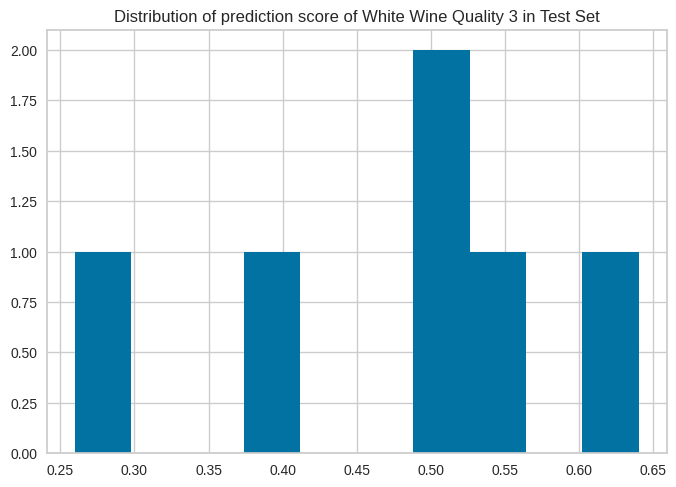



Quality 4


count    49.000000
mean      0.517959
std       0.123305
min       0.310000
25%       0.420000
50%       0.480000
75%       0.600000
max       0.810000
Name: prediction_score, dtype: float64

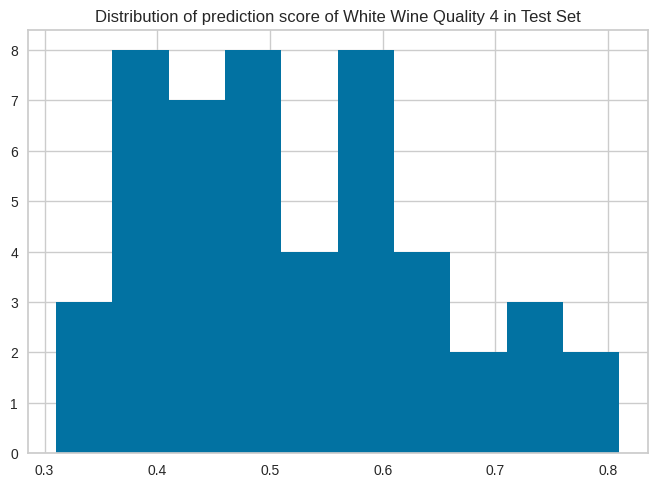



Quality 5


count    437.000000
mean       0.651602
std        0.164855
min        0.320000
25%        0.510000
50%        0.640000
75%        0.780000
max        0.990000
Name: prediction_score, dtype: float64

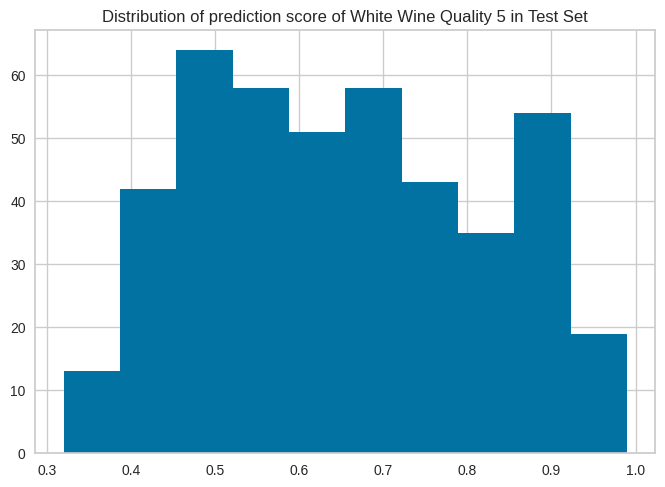



Quality 6


count    660.000000
mean       0.632439
std        0.158718
min        0.320000
25%        0.507500
50%        0.600000
75%        0.760000
max        1.000000
Name: prediction_score, dtype: float64

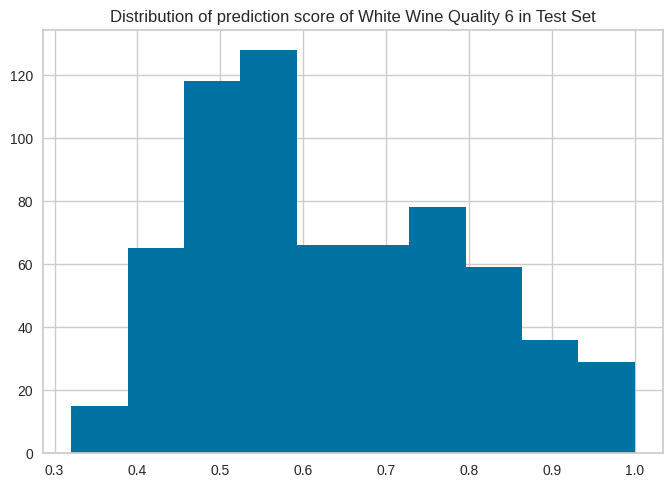



Quality 7


count    264.000000
mean       0.614167
std        0.167128
min        0.350000
25%        0.480000
50%        0.590000
75%        0.730000
max        1.000000
Name: prediction_score, dtype: float64

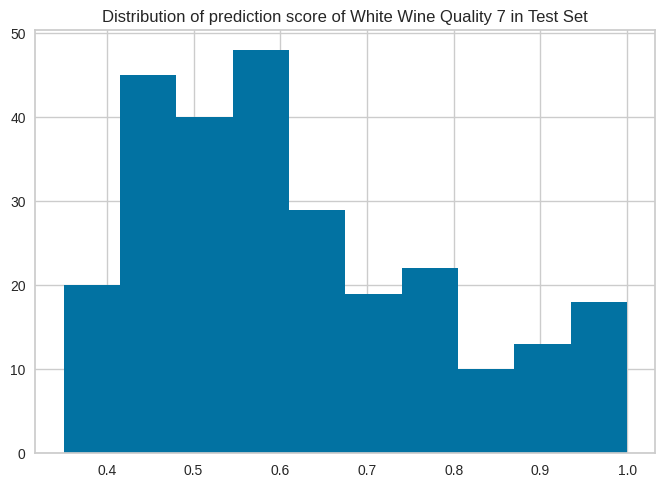



Quality 8


count    53.000000
mean      0.592830
std       0.142308
min       0.350000
25%       0.500000
50%       0.570000
75%       0.690000
max       1.000000
Name: prediction_score, dtype: float64

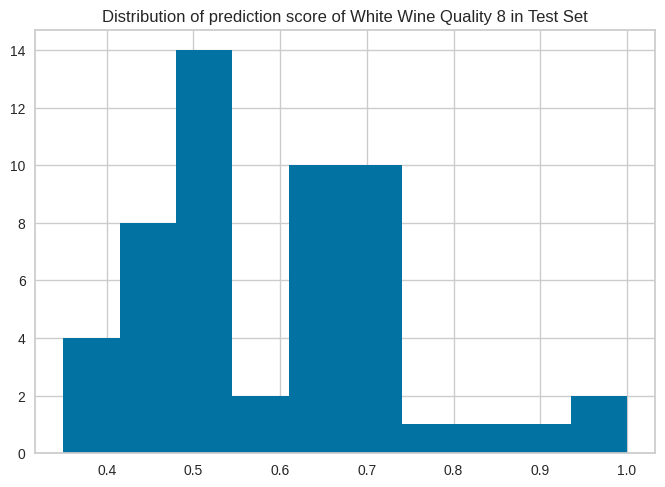



Quality 9


count    1.0
mean     0.5
std      NaN
min      0.5
25%      0.5
50%      0.5
75%      0.5
max      0.5
Name: prediction_score, dtype: float64

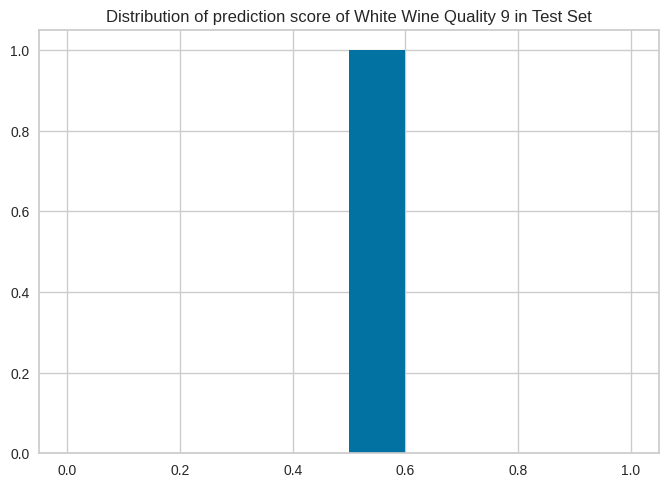

<Figure size 800x550 with 0 Axes>

In [63]:
# understand the model's perdiction score of each classes in Test Set
def hist_plot(x):
    plt.hist(x)
    plt.title(f"Distribution of prediction score of White Wine Quality {q} in Test Set")
    plt.show()
    plt.clf()

for q in df_grp_percent["quality"].unique():
    print(f"\n\nQuality {q}")
    holdout_pred_q = holdout_pred[holdout_pred["quality"] == q]
    display(holdout_pred_q["prediction_score"].describe())
    hist_plot(holdout_pred_q["prediction_score"])

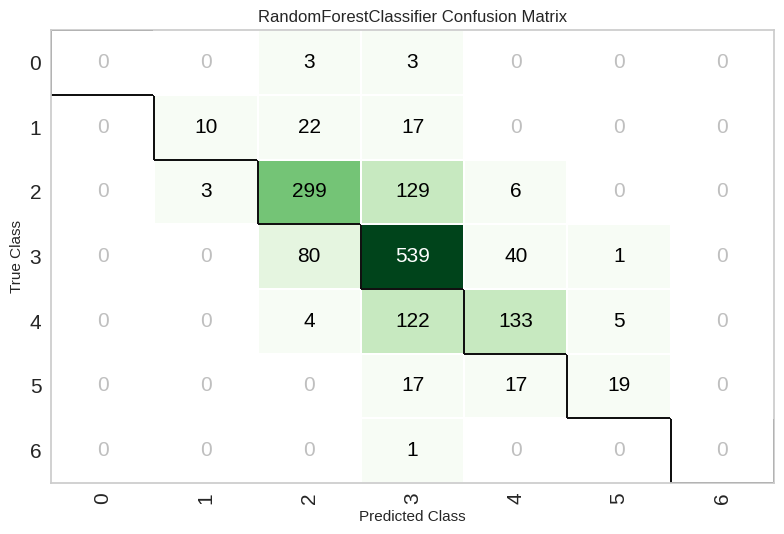

In [65]:
# plot confusion matrix
plot_model(best, plot = 'confusion_matrix')

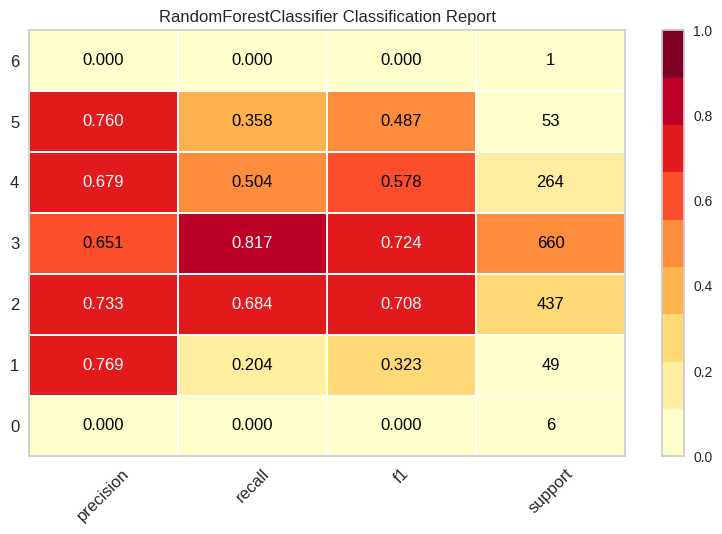

In [71]:
# plot performance by class
plot_model(best, plot = 'class_report')

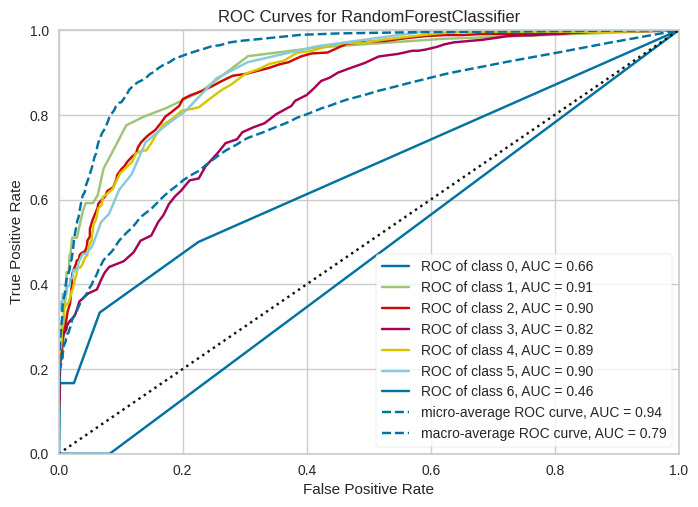

In [66]:
# plot AUC
plot_model(best, plot = 'auc')

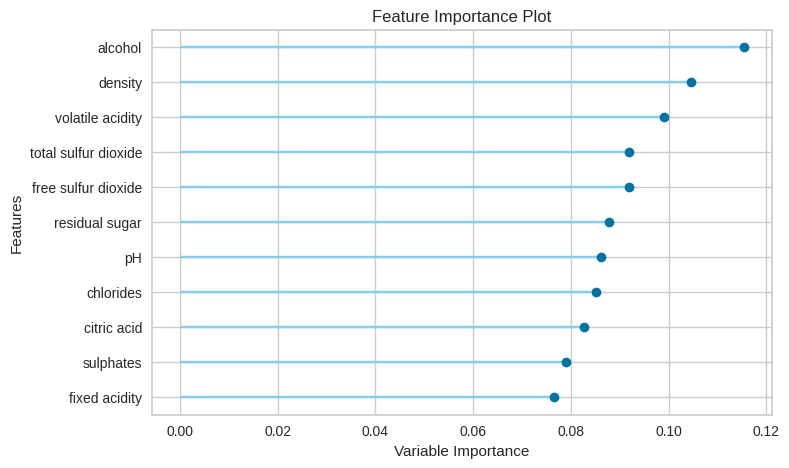

In [68]:
# plot feature importance
plot_model(best, plot = 'feature_all')

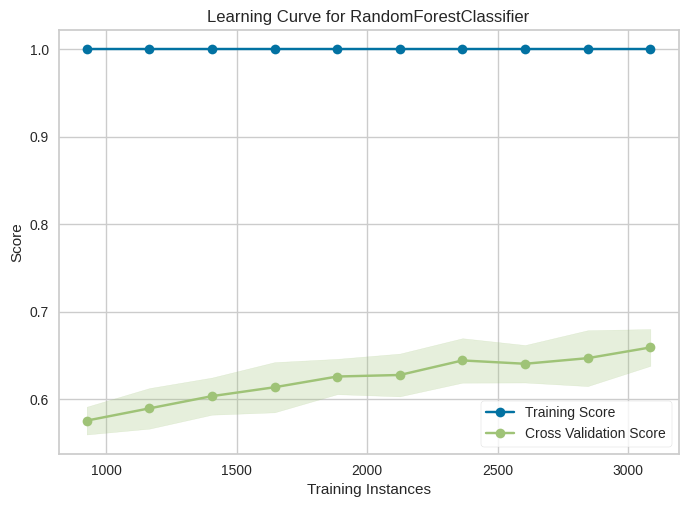

In [69]:
plot_model(best, plot = 'learning')

## Save Model

In [70]:
# save pipeline
save_model(best, 'pycaret_pipeline_white_wine_classification')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['fixed acidity',
                                              'volatile acidity', 'citric acid',
                                              'residual sugar', 'chlorides',
                                              'free sulfur dioxide',
                                              'total sulfur dioxide', 'density',
                                              'pH', 'sulphates...
                  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                         class_weight=None, criterion='gini',
                                         max_depth=None, max_features='sqrt',
               

# Experiment 2: regrouping the Target, AUC 0.8579; low quality recall 0.182 and high quality recall 0.352

## Create new class column

In [19]:
df = pd.read_csv('/content/winequality-white.csv',sep=';')
print(df.shape)
display(df.head())

(4898, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [99]:
# df["quality_group"] = df["quality"].astype("str")

# df["quality_group"] = np.where(df["quality_group"].isin(["3", "4"]), "3_4", df["quality_group"])
# df["quality_group"] = np.where(df["quality_group"].isin(["8", "9"]), "8_9", df["quality_group"])

In [20]:
df["quality_group"] = df["quality"]

df["quality_group"] = np.where(df["quality_group"].isin([3, 4]), 4, df["quality_group"])
df["quality_group"] = np.where(df["quality_group"].isin([8, 9]), 8, df["quality_group"])
df = df.drop(columns = ["quality"])

In [21]:
df_grp2 = df.groupby("quality_group").size()

df_grp_percent2 = pd.DataFrame(df_grp2)
df_grp_percent2.columns = ["count"]

df_grp_percent2 = df_grp_percent2.reset_index()

df_grp_percent2["percent"] = round(df_grp_percent2["count"]/df.shape[0] * 100, 2)
df_grp_percent2

,quality_group,count,percent
0,4,183,3.74
1,5,1457,29.75
2,6,2198,44.88
3,7,880,17.97
4,8,180,3.67


In [23]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_group
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


## EDA

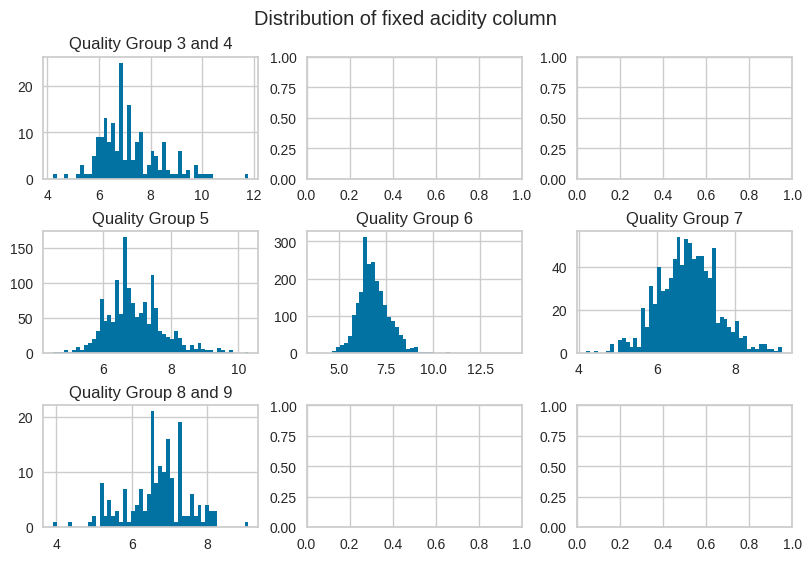

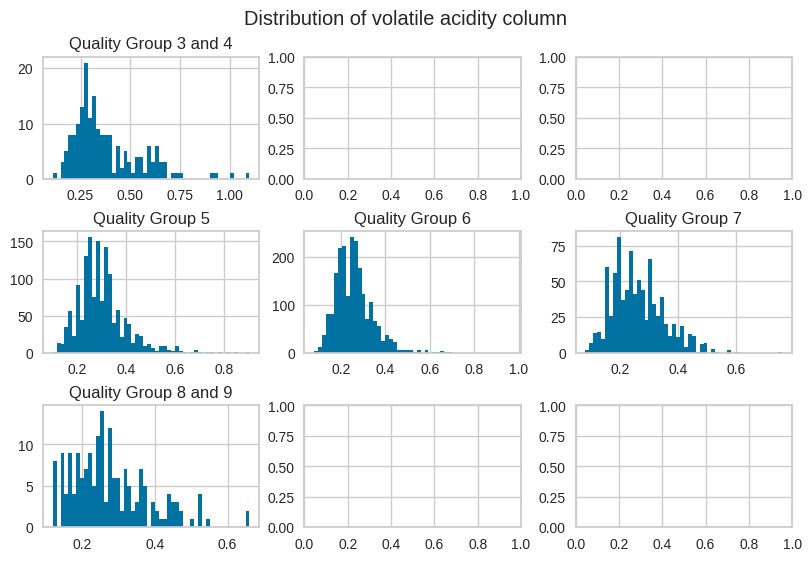

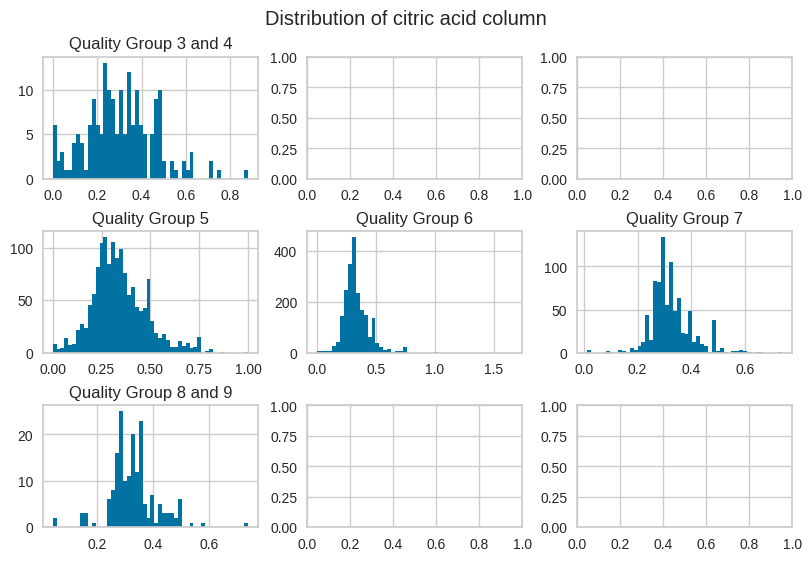

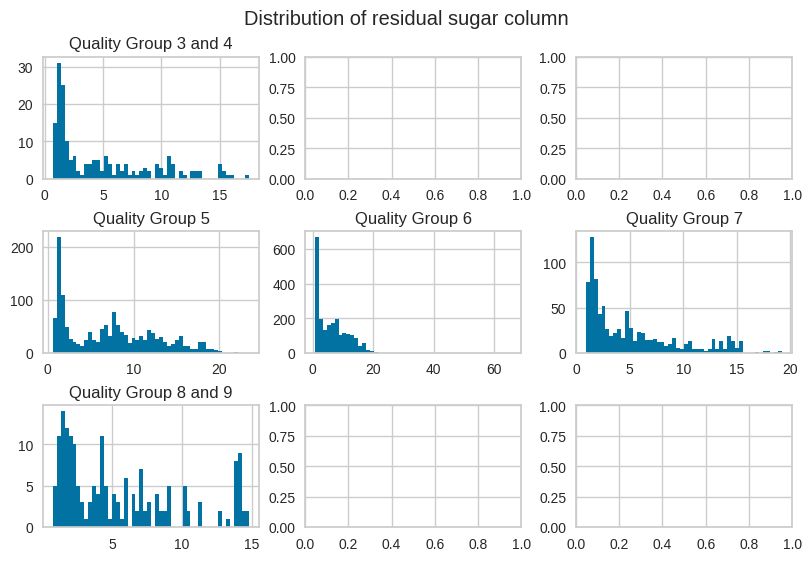

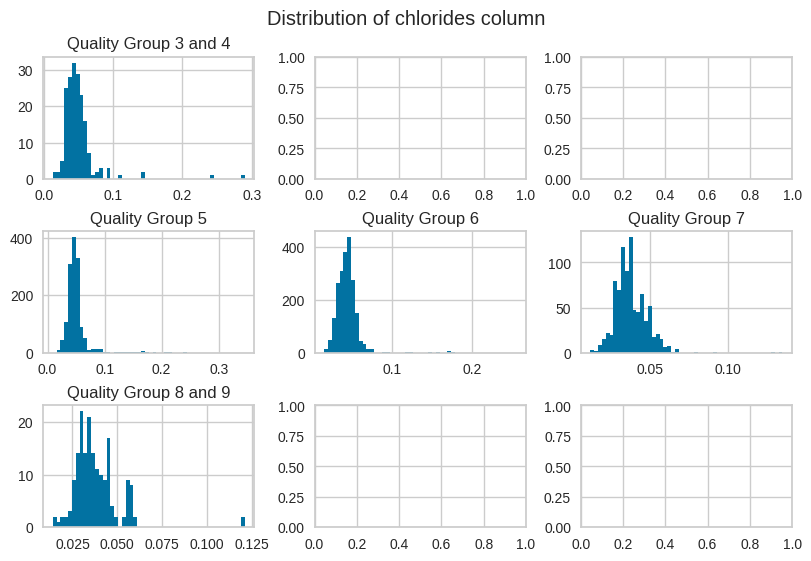

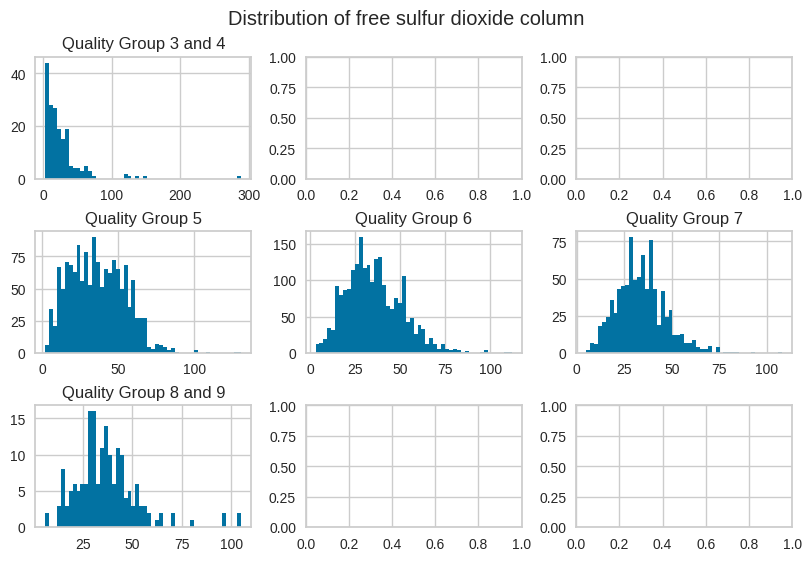

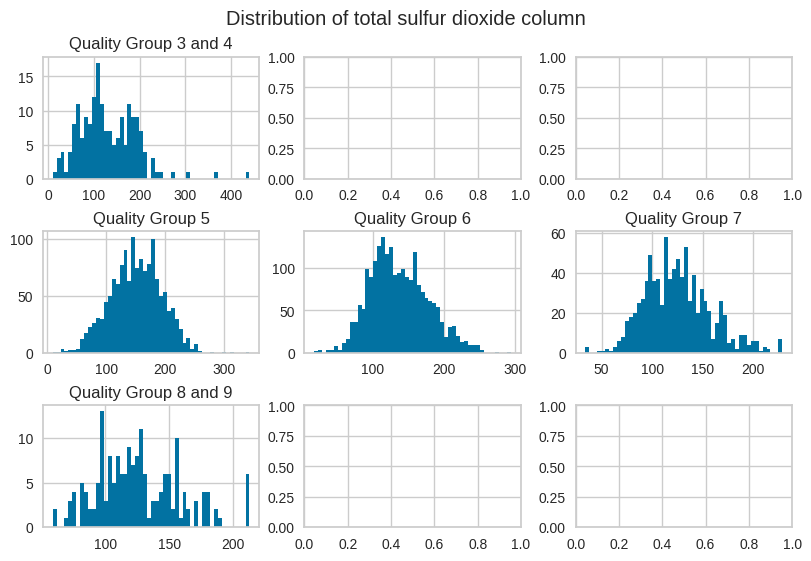

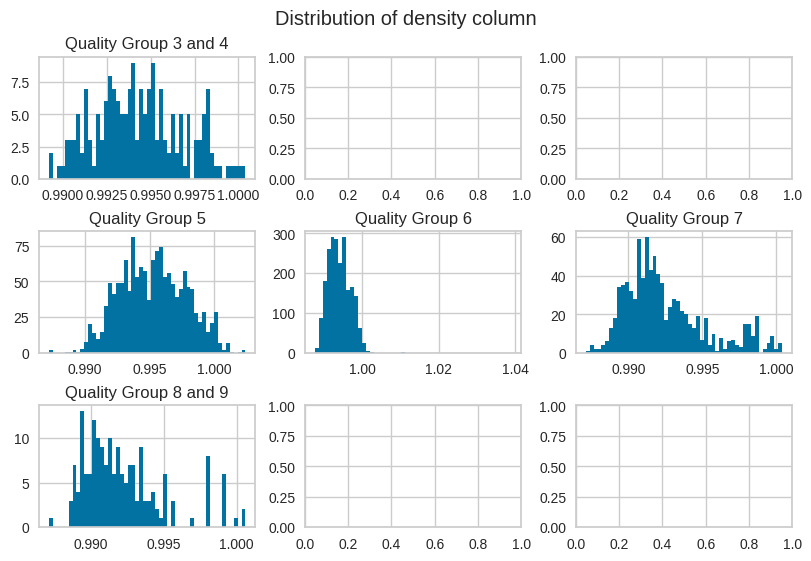

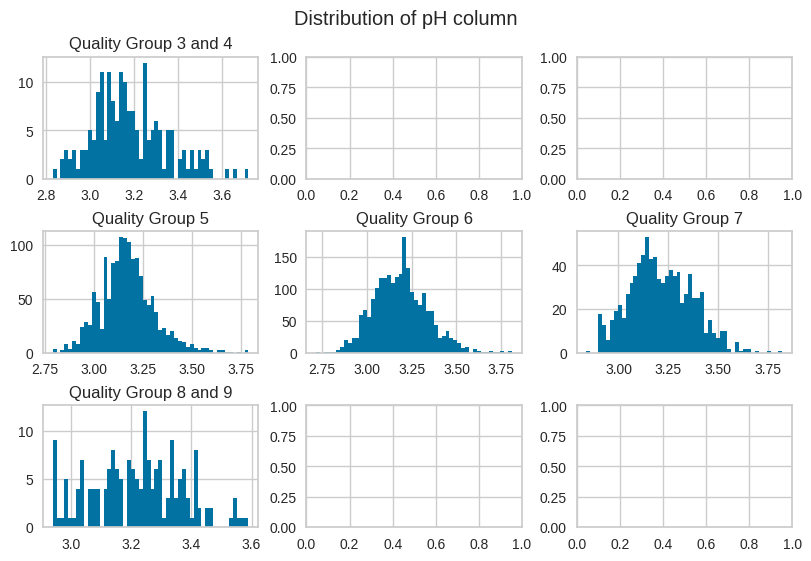

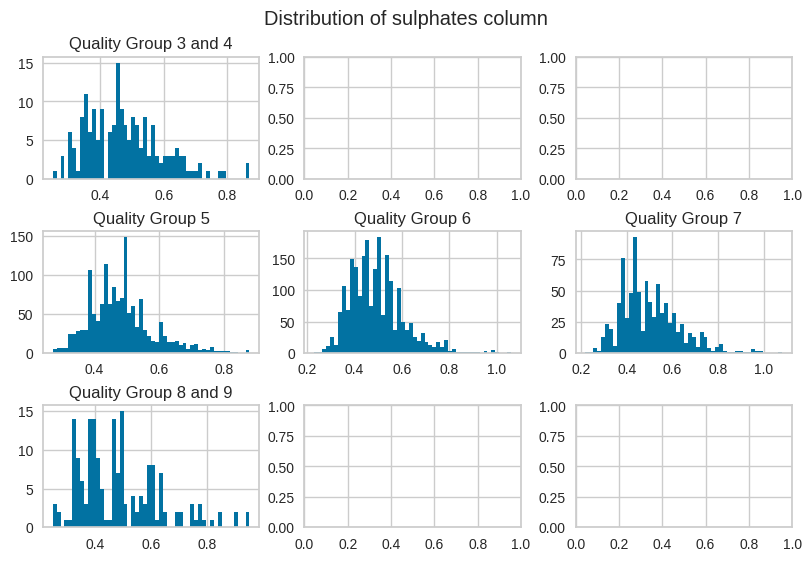

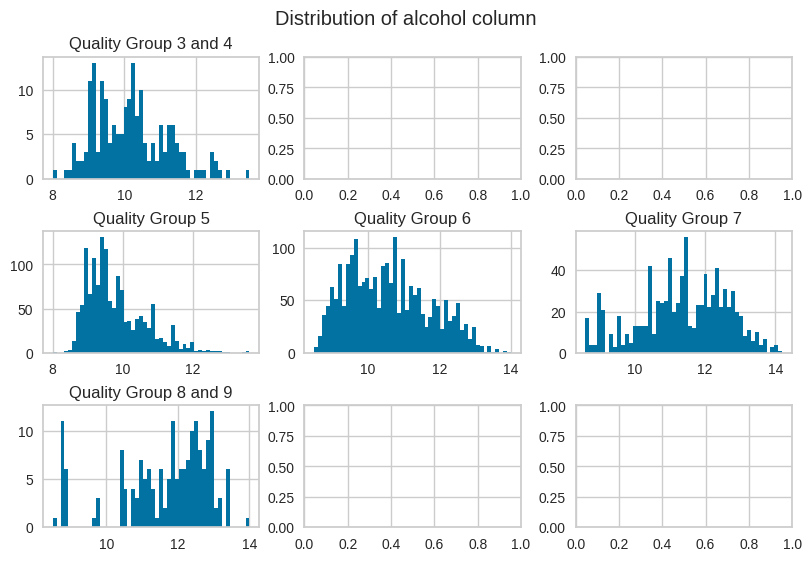

In [104]:
for c in df.columns:
    if c not in ["quality", "quality_group"]:
        fig, axs = plt.subplots(3, 3, layout="constrained")
        #fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
        fig.suptitle(f"Distribution of {c} column")

        axs[0, 0].hist(df[df["quality_group"] == "3_4"][c]
                , bins = 50
            )

        axs[0, 0].set_title(f'Quality Group {"3 and 4"}')



        axs[1, 0].hist(df[df["quality_group"] == "5"][c]
                , bins = 50
            )

        axs[1, 0].set_title(f'Quality Group {5}')

        axs[1, 1].hist(df[df["quality_group"] == "6"][c]
                , bins = 50
            )

        axs[1, 1].set_title(f'Quality Group {6}')

        axs[1, 2].hist(df[df["quality_group"] == "7"][c]
                , bins = 50
            )

        axs[1, 2].set_title(f'Quality Group {7}')

        axs[2, 0].hist(df[df["quality_group"] == "8_9"][c]
                , bins = 50
            )

        axs[2, 0].set_title(f'Quality Group {"8 and 9"}')




        plt.show()

## Train

In [115]:
# import pycaret classification and init setup
from pycaret.classification import *
s = setup(df
          , target = 'quality_group'
          , session_id = 2023
          , normalize = True
          , normalize_method = 'minmax'
           )

# compare baseline models
best = compare_models()
print("Best model's parameter:")
print(best)

,Description,Value
0,Session id,2023
1,Target,quality_group
2,Target type,Multiclass
3,Target mapping,"4: 0, 5: 1, 6: 2, 7: 3, 8: 4"
4,Original data shape,"(4898, 12)"
5,Transformed data shape,"(4898, 12)"
6,Transformed train set shape,"(3428, 12)"
7,Transformed test set shape,"(1470, 12)"
8,Numeric features,11
9,Preprocess,True


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.6578,0.8385,0.6578,0.6725,0.6451,0.4631,0.4716,0.5760
et,Extra Trees Classifier,0.6546,0.8464,0.6546,0.6724,0.6434,0.4583,0.4666,0.3190
catboost,CatBoost Classifier,0.6432,0.8151,0.6432,0.6517,0.6345,0.4485,0.4524,7.4470
lightgbm,Light Gradient Boosting Machine,0.6424,0.8197,0.6424,0.6474,0.6334,0.4466,0.4514,1.8050
xgboost,Extreme Gradient Boosting,0.6316,0.8143,0.6316,0.6385,0.6241,0.4324,0.4362,0.3880
gbc,Gradient Boosting Classifier,0.5919,0.7766,0.5919,0.5937,0.5765,0.3587,0.3668,2.5140
dt,Decision Tree Classifier,0.5723,0.6796,0.5723,0.5737,0.5718,0.3668,0.3673,0.0460
knn,K Neighbors Classifier,0.5330,0.7194,0.5330,0.5213,0.5208,0.2837,0.2853,0.0660
lda,Linear Discriminant Analysis,0.5327,0.7079,0.5327,0.5151,0.5070,0.2542,0.2648,0.0340
lr,Logistic Regression,0.5277,0.7066,0.5277,0.5044,0.4784,0.2219,0.2400,0.6870


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

Best model's parameter:
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=2023, verbose=0, warm_start=False)


## Evaluate on Test set

In [116]:
# predict on test set
holdout_pred = predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.6776,0.8579,0.6776,0.6849,0.6656,0.4950,0.5038




Quality Group4


count    55.000000
mean      0.521818
std       0.102326
min       0.340000
25%       0.450000
50%       0.510000
75%       0.600000
max       0.730000
Name: prediction_score, dtype: float64

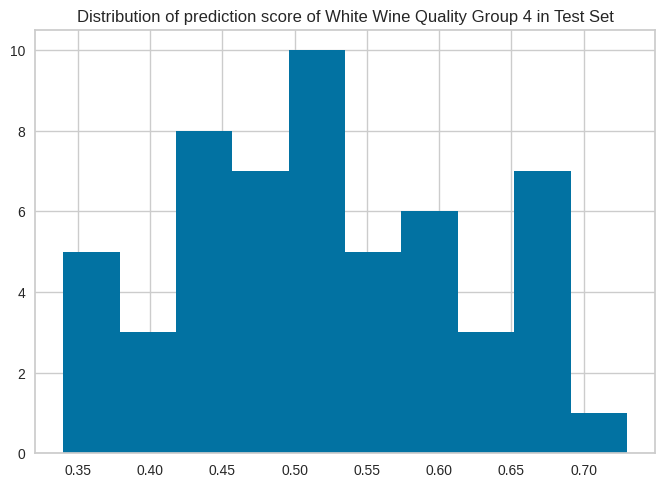



Quality Group5


count    437.000000
mean       0.647872
std        0.157363
min        0.260000
25%        0.520000
50%        0.620000
75%        0.790000
max        1.000000
Name: prediction_score, dtype: float64

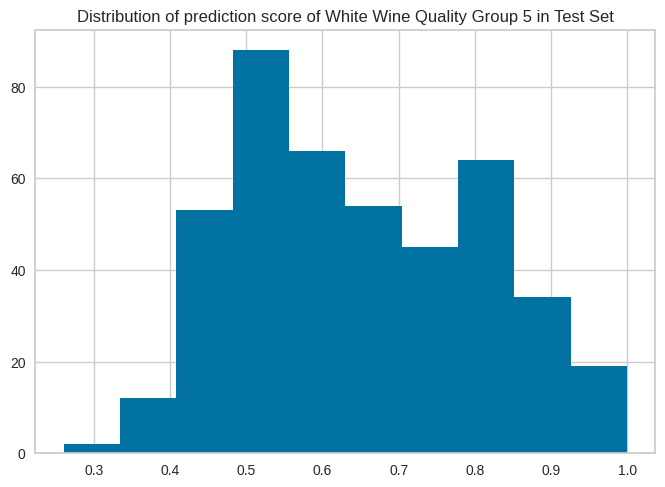



Quality Group6


count    660.000000
mean       0.632030
std        0.159047
min        0.300000
25%        0.507500
50%        0.600000
75%        0.760000
max        1.000000
Name: prediction_score, dtype: float64

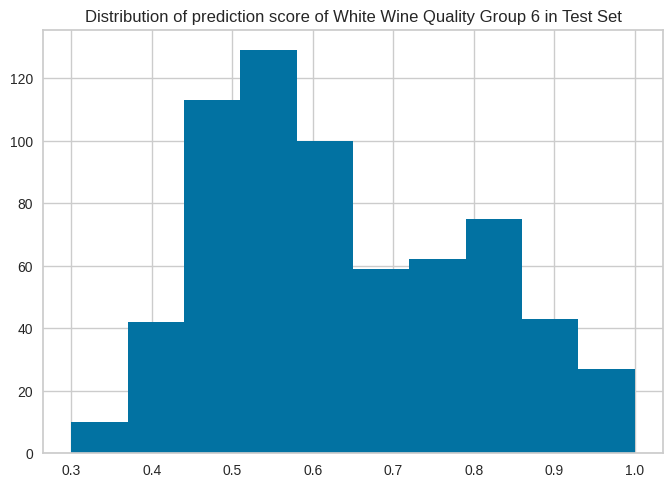



Quality Group7


count    264.000000
mean       0.614129
std        0.168171
min        0.330000
25%        0.477500
50%        0.580000
75%        0.730000
max        1.000000
Name: prediction_score, dtype: float64

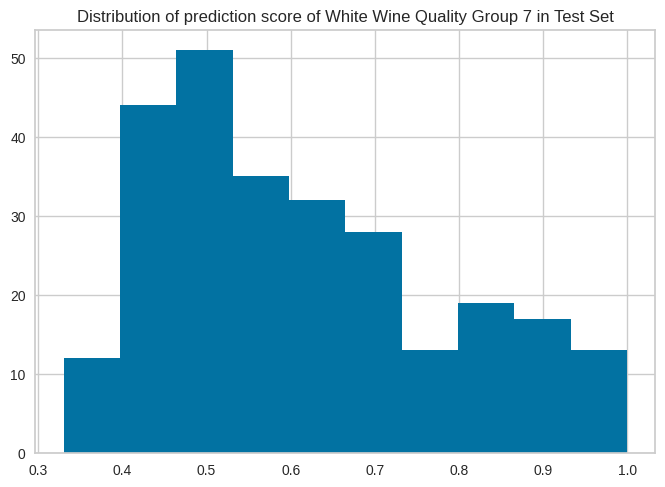



Quality Group8


count    54.000000
mean      0.574630
std       0.163392
min       0.300000
25%       0.465000
50%       0.510000
75%       0.660000
max       1.000000
Name: prediction_score, dtype: float64

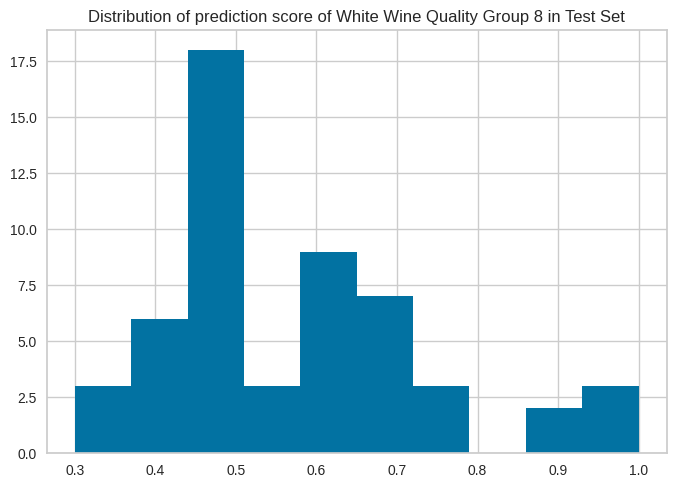

<Figure size 800x550 with 0 Axes>

In [118]:
# understand the model's perdiction score of each classes in Test Set
def hist_plot(x):
    plt.hist(x)
    plt.title(f"Distribution of prediction score of White Wine Quality Group {q} in Test Set")
    plt.show()
    plt.clf()

for q in df_grp_percent2["quality_group"].unique():
    print(f"\n\nQuality Group{q}")
    holdout_pred_q = holdout_pred[holdout_pred["quality_group"] == q]
    display(holdout_pred_q["prediction_score"].describe())
    hist_plot(holdout_pred_q["prediction_score"])

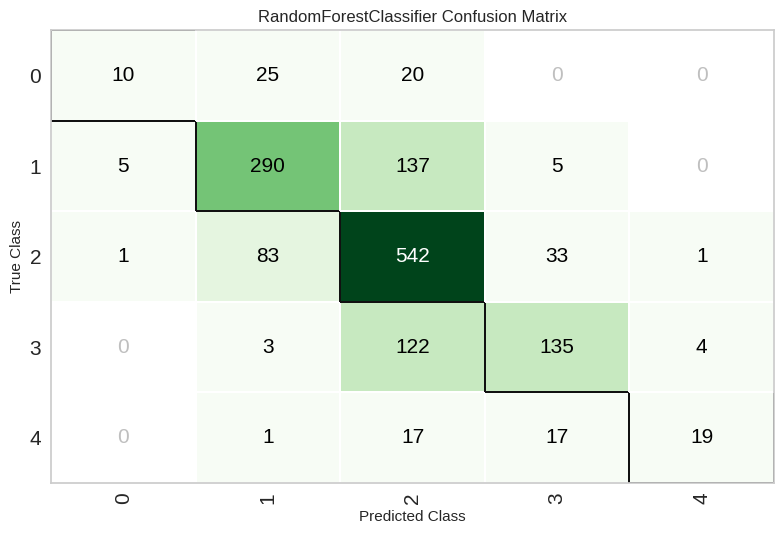

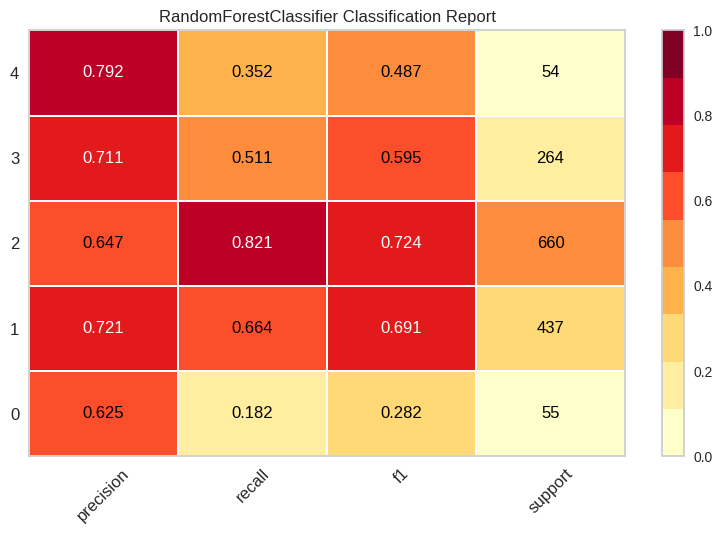

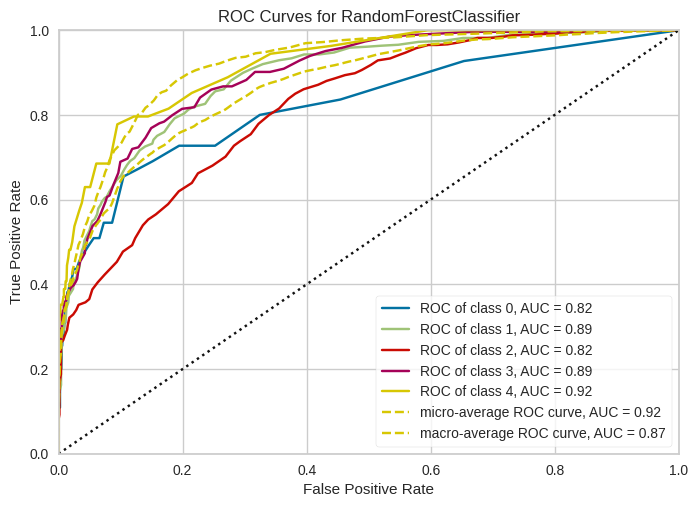

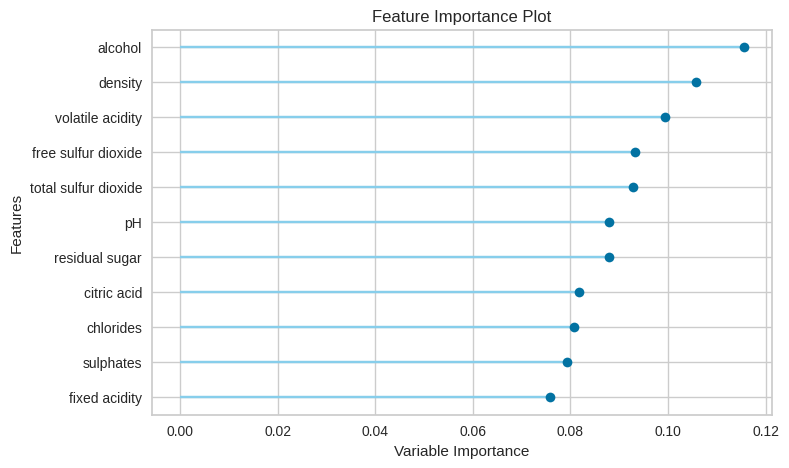

In [119]:
# plot confusion matrix
plot_model(best, plot = 'confusion_matrix')
# plot performance by class
plot_model(best, plot = 'class_report')
# plot AUC
plot_model(best, plot = 'auc')
# plot feature importance
plot_model(best, plot = 'feature_all')

## Save model

In [120]:
# save pipeline
save_model(best, 'pycaret_pipeline_white_wine_classification2')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['fixed acidity',
                                              'volatile acidity', 'citric acid',
                                              'residual sugar', 'chlorides',
                                              'free sulfur dioxide',
                                              'total sulfur dioxide', 'density',
                                              'pH', 'sulphates...
                  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                         class_weight=None, criterion='gini',
                                         max_depth=None, max_features='sqrt',
               

# Experiment 3: regrouping the Target and use SMOTE - AUC 0.8601; low quality recall 0.473 and high quality recall 0.5

## Create new class column

In [125]:
df = pd.read_csv('/content/winequality-white.csv',sep=';')
print(df.shape)
display(df.head())

(4898, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [129]:
df["quality_group"] = df["quality"]

df["quality_group"] = np.where(df["quality_group"].isin([3, 4]), 4, df["quality_group"])
df["quality_group"] = np.where(df["quality_group"].isin([8, 9]), 8, df["quality_group"])
df = df.drop(columns = ["quality"])

## Train

In [131]:
# import pycaret classification and init setup
from pycaret.classification import *
s = setup(df
          , target = 'quality_group'
          , session_id = 2023
          , normalize = True
          , normalize_method = 'minmax'
          , fix_imbalance = True
          , fix_imbalance_method= 'SMOTE'
          )

# compare baseline models
best = compare_models()
print("Best model's parameter:")
print(best)

,Description,Value
0,Session id,2023
1,Target,quality_group
2,Target type,Multiclass
3,Target mapping,"4: 0, 5: 1, 6: 2, 7: 3, 8: 4"
4,Original data shape,"(4898, 12)"
5,Transformed data shape,"(9160, 12)"
6,Transformed train set shape,"(7690, 12)"
7,Transformed test set shape,"(1470, 12)"
8,Numeric features,11
9,Preprocess,True


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.6254,0.8431,0.6254,0.6342,0.6269,0.4554,0.4569,0.5290
xgboost,Extreme Gradient Boosting,0.6173,0.8092,0.6173,0.6180,0.6158,0.4293,0.4299,0.9520
rf,Random Forest Classifier,0.6161,0.8335,0.6161,0.6273,0.6189,0.4423,0.4436,1.8450
catboost,CatBoost Classifier,0.6109,0.8035,0.6109,0.6160,0.6117,0.4282,0.4290,14.6330
lightgbm,Light Gradient Boosting Machine,0.6082,0.8066,0.6082,0.6106,0.6076,0.4187,0.4194,4.0910
dt,Decision Tree Classifier,0.5344,0.6726,0.5344,0.5646,0.5442,0.3384,0.3410,0.0930
gbc,Gradient Boosting Classifier,0.5108,0.7509,0.5108,0.5407,0.5183,0.3115,0.3151,9.2100
knn,K Neighbors Classifier,0.4691,0.7244,0.4691,0.5418,0.4813,0.2880,0.2987,0.0950
qda,Quadratic Discriminant Analysis,0.3649,0.6795,0.3649,0.4773,0.3630,0.1944,0.2131,0.0640
lda,Linear Discriminant Analysis,0.3615,0.6844,0.3615,0.4706,0.3823,0.1744,0.1860,0.1040


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

Best model's parameter:
ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=2023, verbose=0, warm_start=False)


## Evaluate on Test Set

In [132]:
# predict on test set
holdout_pred = predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.6422,0.8601,0.6422,0.6525,0.6460,0.4803,0.4810




Quality Group4


count    55.000000
mean      0.551455
std       0.178672
min       0.300000
25%       0.450000
50%       0.500000
75%       0.605000
max       1.000000
Name: prediction_score, dtype: float64

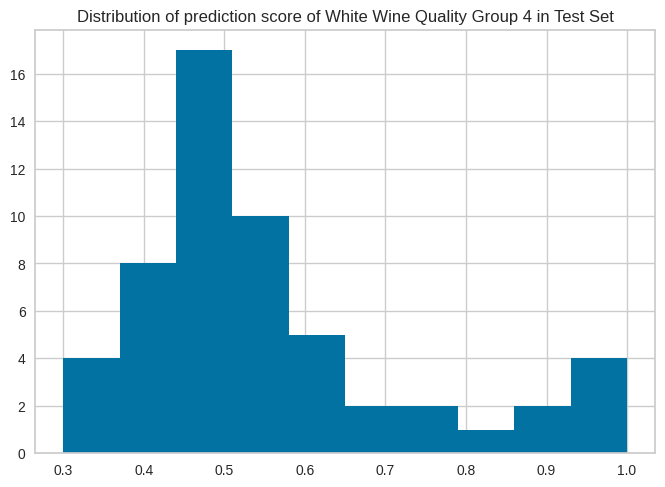



Quality Group5


count    437.000000
mean       0.666339
std        0.242939
min        0.270000
25%        0.450000
50%        0.600000
75%        1.000000
max        1.000000
Name: prediction_score, dtype: float64

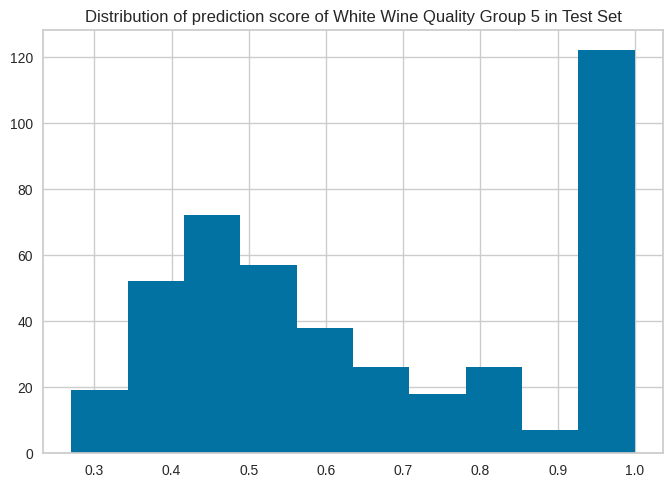



Quality Group6


count    660.000000
mean       0.622515
std        0.257239
min        0.210000
25%        0.420000
50%        0.510000
75%        1.000000
max        1.000000
Name: prediction_score, dtype: float64

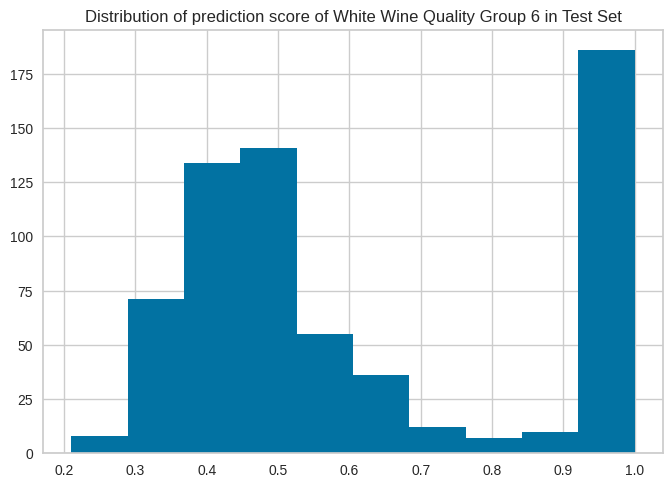



Quality Group7


count    264.000000
mean       0.630795
std        0.256353
min        0.270000
25%        0.420000
50%        0.520000
75%        1.000000
max        1.000000
Name: prediction_score, dtype: float64

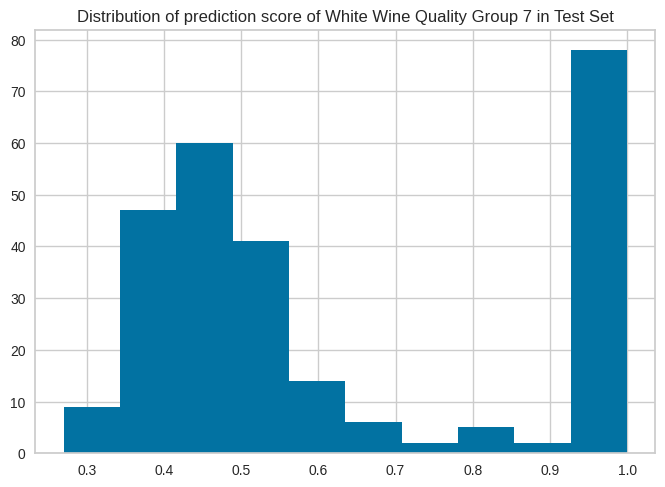



Quality Group8


count    54.000000
mean      0.642037
std       0.259691
min       0.300000
25%       0.432500
50%       0.520000
75%       1.000000
max       1.000000
Name: prediction_score, dtype: float64

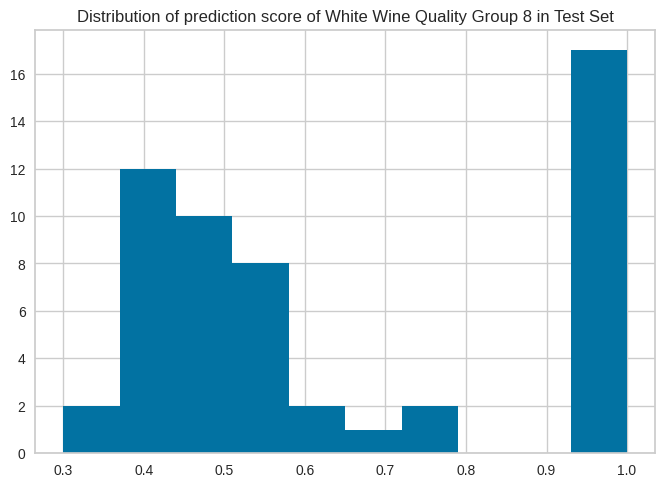

<Figure size 800x550 with 0 Axes>

In [133]:
# understand the model's perdiction score of each classes in Test Set
def hist_plot(x):
    plt.hist(x)
    plt.title(f"Distribution of prediction score of White Wine Quality Group {q} in Test Set")
    plt.show()
    plt.clf()

for q in df_grp_percent2["quality_group"].unique():
    print(f"\n\nQuality Group{q}")
    holdout_pred_q = holdout_pred[holdout_pred["quality_group"] == q]
    display(holdout_pred_q["prediction_score"].describe())
    hist_plot(holdout_pred_q["prediction_score"])

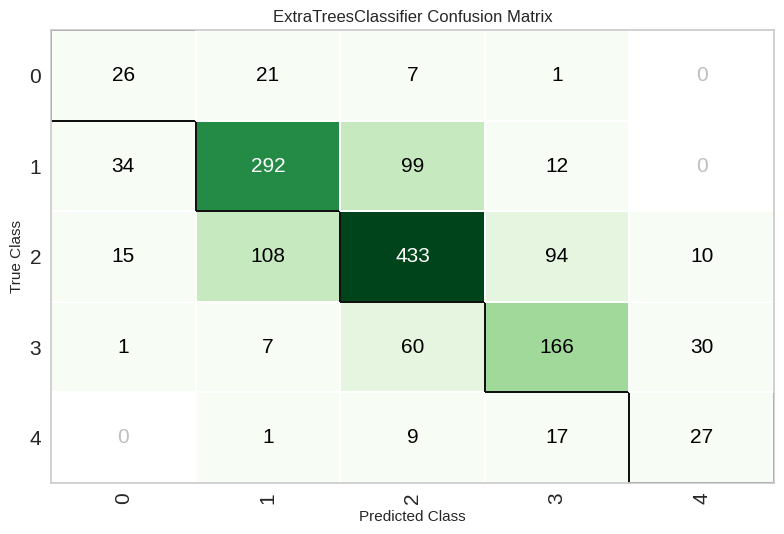

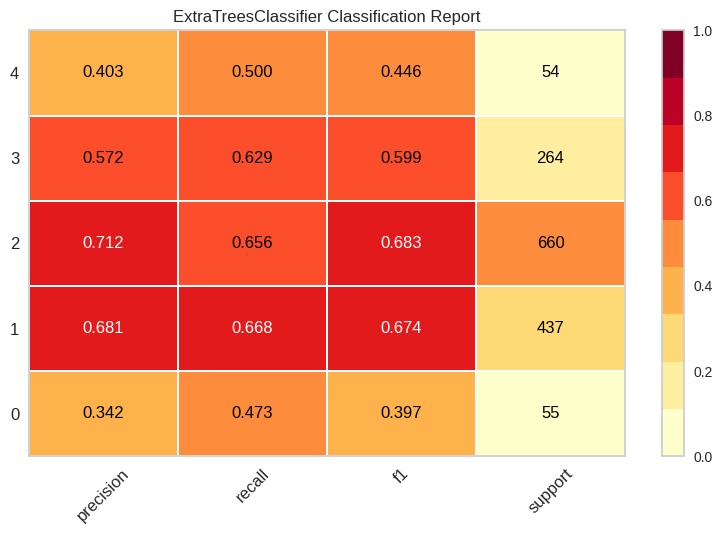

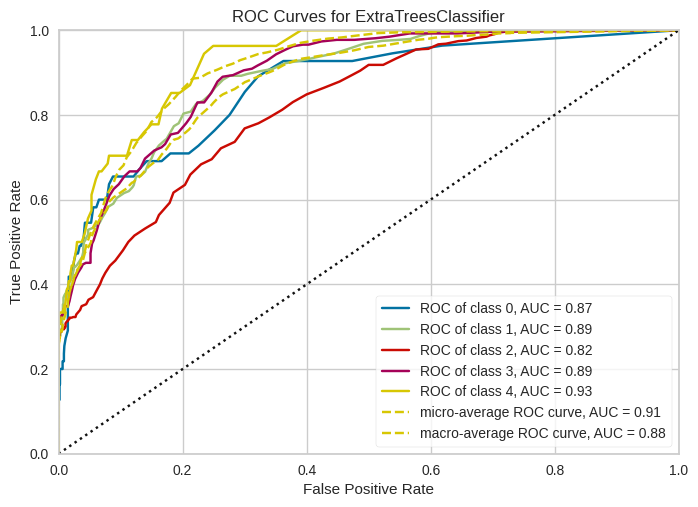

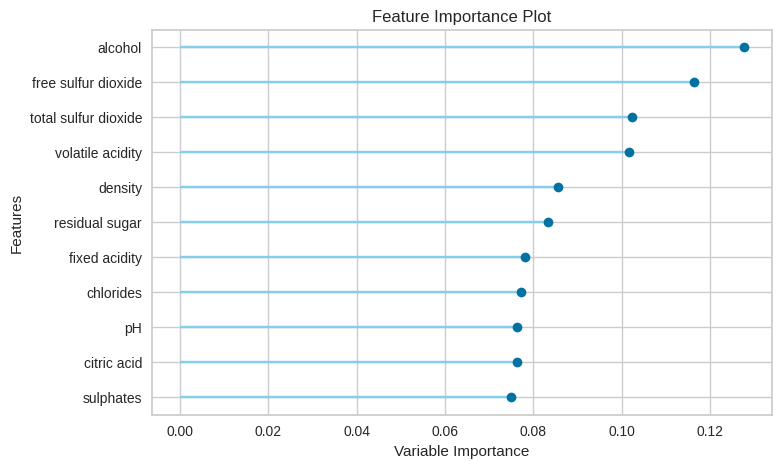

In [134]:
# plot confusion matrix
plot_model(best, plot = 'confusion_matrix')
# plot performance by class
plot_model(best, plot = 'class_report')
# plot AUC
plot_model(best, plot = 'auc')
# plot feature importance
plot_model(best, plot = 'feature_all')

## Save model

In [135]:
# save pipeline
save_model(best, 'pycaret_pipeline_white_wine_classification3')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['fixed acidity',
                                              'volatile acidity', 'citric acid',
                                              'residual sugar', 'chlorides',
                                              'free sulfur dioxide',
                                              'total sulfur dioxide', 'density',
                                              'pH', 'sulphates...
                  ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                       class_weight=None, criterion='gini',
                                       max_depth=None, max_features='sqrt',
                    

# Experiment4: regrouping the Target, use SMOTE and tune model using optuna - AUC 0.8550, low quality recall 0.527 and high quality recall 0.5

## Create new class column

In [3]:
df = pd.read_csv('/content/winequality-white.csv',sep=';')
print(df.shape)
display(df.head())
df["quality_group"] = df["quality"]

df["quality_group"] = np.where(df["quality_group"].isin([3, 4]), 4, df["quality_group"])
df["quality_group"] = np.where(df["quality_group"].isin([8, 9]), 8, df["quality_group"])
df = df.drop(columns = ["quality"])

(4898, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


## Train using optuna

In [4]:
# import pycaret classification and init setup
from pycaret.classification import *
s = setup(df
          , target = 'quality_group'
          , session_id = 2023
          , normalize = True
          , normalize_method = 'minmax'
          , fix_imbalance = True
          , fix_imbalance_method= 'SMOTE'
          )



,Description,Value
0,Session id,2023
1,Target,quality_group
2,Target type,Multiclass
3,Target mapping,"4: 0, 5: 1, 6: 2, 7: 3, 8: 4"
4,Original data shape,"(4898, 12)"
5,Transformed data shape,"(9160, 12)"
6,Transformed train set shape,"(7690, 12)"
7,Transformed test set shape,"(1470, 12)"
8,Numeric features,11
9,Preprocess,True


In [5]:
# train a dt model with default params
rf = create_model("rf")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6035,0.8146,0.6035,0.6094,0.6057,0.4216,0.4220
1,0.6006,0.8302,0.6006,0.6207,0.6061,0.4244,0.4271
2,0.5860,0.8162,0.5860,0.6044,0.5920,0.4058,0.4073
3,0.6647,0.8624,0.6647,0.6727,0.6655,0.5163,0.5184
4,0.6210,0.8280,0.6210,0.6361,0.6264,0.4508,0.4518
5,0.6122,0.8373,0.6122,0.6166,0.6110,0.4255,0.4260
6,0.6006,0.8377,0.6006,0.6160,0.6061,0.4233,0.4240
7,0.6122,0.8231,0.6122,0.6134,0.6102,0.4282,0.4287
8,0.6199,0.8378,0.6199,0.6318,0.6245,0.4472,0.4481


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [8]:
# define tuning grid

# tune model with custom grid and metric
tuned_rf, tuner = tune_model(rf, search_library = 'optuna'
                      , optimize = 'AUC', return_tuner=True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.4985,0.7508,0.4985,0.5237,0.4983,0.3047,0.3108
1,0.5539,0.7932,0.5539,0.6105,0.5641,0.3823,0.3931
2,0.5277,0.7513,0.5277,0.5689,0.5386,0.3401,0.3452
3,0.6006,0.8100,0.6006,0.6247,0.6002,0.4398,0.4470
4,0.5219,0.7655,0.5219,0.5544,0.5309,0.3274,0.3309
5,0.5190,0.7636,0.5190,0.5384,0.5221,0.3174,0.3209
6,0.5423,0.7990,0.5423,0.5763,0.5511,0.3602,0.3640
7,0.5481,0.7702,0.5481,0.5615,0.5495,0.3543,0.3573
8,0.5058,0.7782,0.5058,0.5406,0.5106,0.3091,0.3153


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

[I 2023-11-25 18:46:15,149] Searching the best hyperparameters using 3428 samples...
[I 2023-11-25 18:53:11,150] Finished hyperparameter search!


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [13]:
# model object
tuned_rf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=2023, verbose=0, warm_start=False)

In [14]:
# tuner object
tuner

OptunaSearchCV(callbacks=None,
               cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
               enable_pruning=False, error_score='raise',
               estimator=Pipeline(memory=Memory(location=None),
                                  steps=[('label_encoding',
                                          TransformerWrapperWithInverse(exclude=None,
                                                                        include=None,
                                                                        transformer=LabelEncoder())),
                                         ('numerical_imputer',
                                          TransformerWrapper(exclude=None,
                                                             incl...
                                    'actual_estimator__min_samples_split': IntDistribution(high=10, log=False, low=2, step=1),
                                    'actual_estimator__n_estimators': IntDistribution(high=300, log=False, low=10, step=1)},
               random_state=2023, refit=False, return_train_score=False,
               scoring=make_scorer(roc_auc_score, needs_proba=True, error_score=0.0, average=weighted, multi_class=ovr),
               study=<optuna.study.study.Study object at 0x7d4339c0fbb0>,
               subsample=1.0, timeout=None, verbose=1)

## Evaluate on Test set

In [16]:
# predict on test set
holdout_pred = predict_model(tuned_rf)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.6442,0.8550,0.6442,0.6652,0.6515,0.4892,0.4909




Quality Group4


count    55.000000
mean      0.559273
std       0.174152
min       0.290000
25%       0.430000
50%       0.520000
75%       0.660000
max       0.970000
Name: prediction_score, dtype: float64

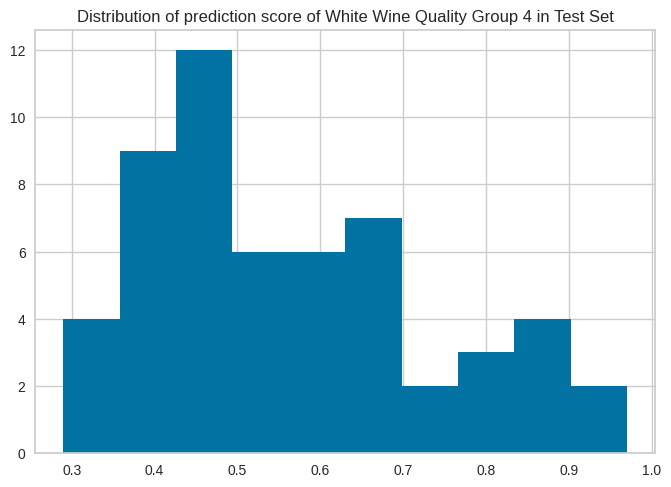



Quality Group5


count    437.000000
mean       0.627231
std        0.184936
min        0.240000
25%        0.470000
50%        0.600000
75%        0.790000
max        0.990000
Name: prediction_score, dtype: float64

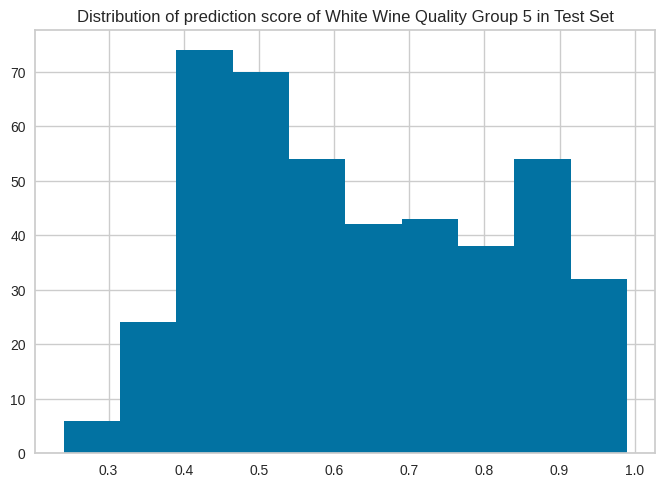



Quality Group6


count    660.000000
mean       0.567288
std        0.177335
min        0.240000
25%        0.420000
50%        0.520000
75%        0.720000
max        0.990000
Name: prediction_score, dtype: float64

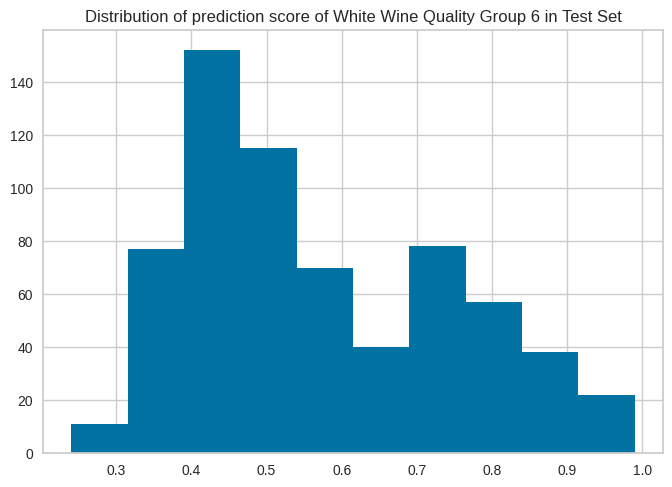



Quality Group7


count    264.000000
mean       0.608371
std        0.202978
min        0.280000
25%        0.440000
50%        0.540000
75%        0.760000
max        1.000000
Name: prediction_score, dtype: float64

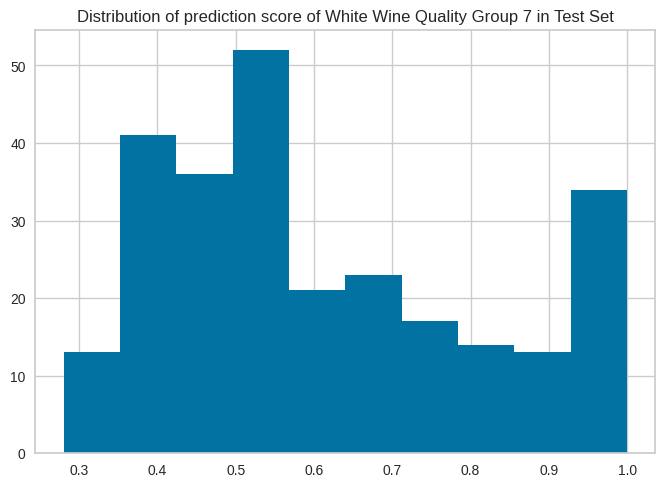



Quality Group8


count    54.000000
mean      0.628889
std       0.234623
min       0.310000
25%       0.437500
50%       0.545000
75%       0.877500
max       1.000000
Name: prediction_score, dtype: float64

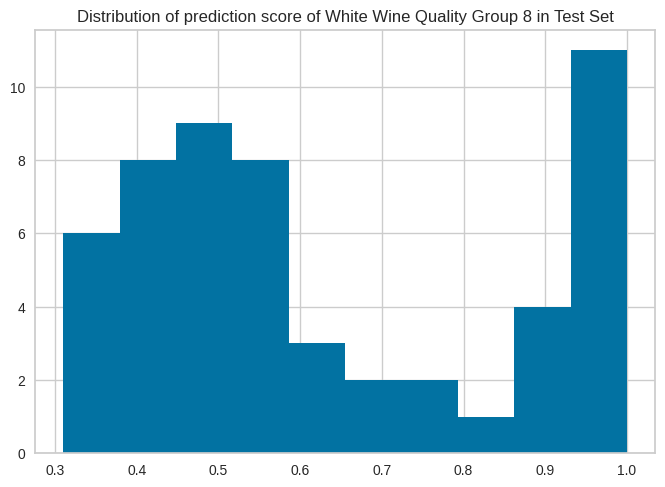

<Figure size 800x550 with 0 Axes>

In [24]:
# understand the model's perdiction score of each classes in Test Set
def hist_plot(x):
    plt.hist(x)
    plt.title(f"Distribution of prediction score of White Wine Quality Group {q} in Test Set")
    plt.show()
    plt.clf()

for q in df_grp_percent2["quality_group"].unique():
    print(f"\n\nQuality Group{q}")
    holdout_pred_q = holdout_pred[holdout_pred["quality_group"] == q]
    display(holdout_pred_q["prediction_score"].describe())
    hist_plot(holdout_pred_q["prediction_score"])

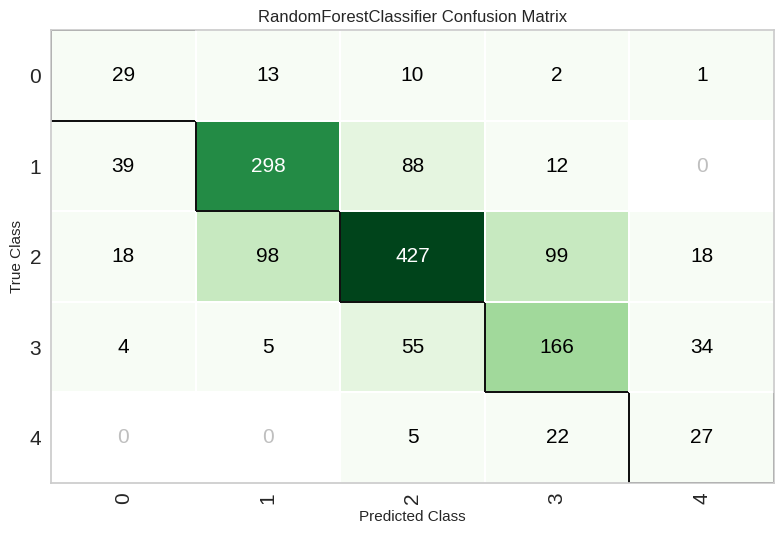

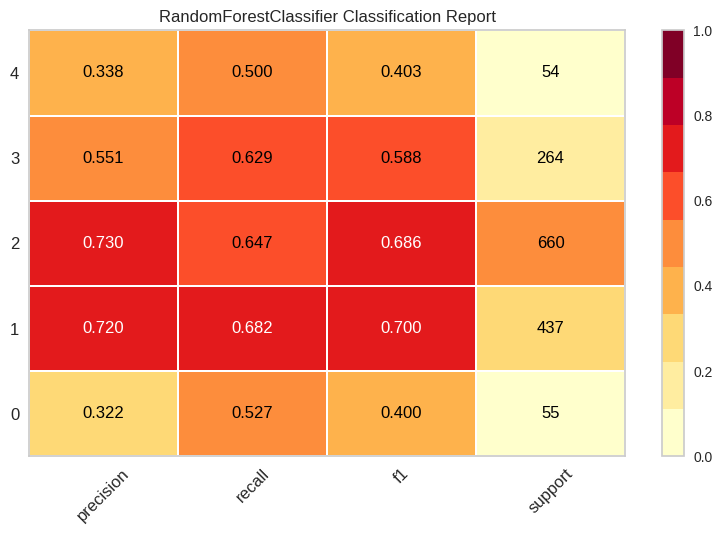

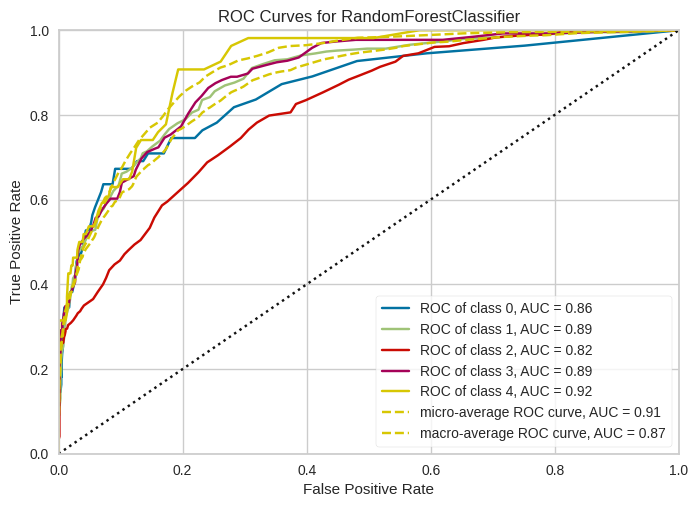

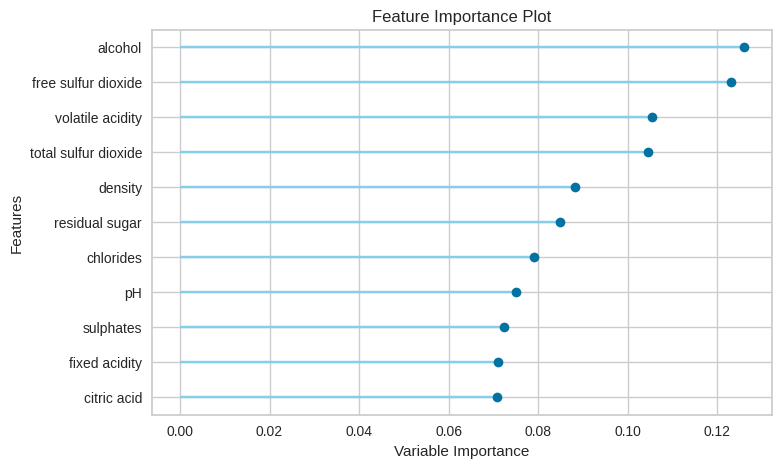

In [28]:
# plot confusion matrix
plot_model(tuned_rf, plot = 'confusion_matrix')
# plot performance by class
plot_model(tuned_rf, plot = 'class_report')
# plot AUC
plot_model(tuned_rf, plot = 'auc')
# plot feature importance
plot_model(tuned_rf, plot = 'feature_all')

## Model interpretation

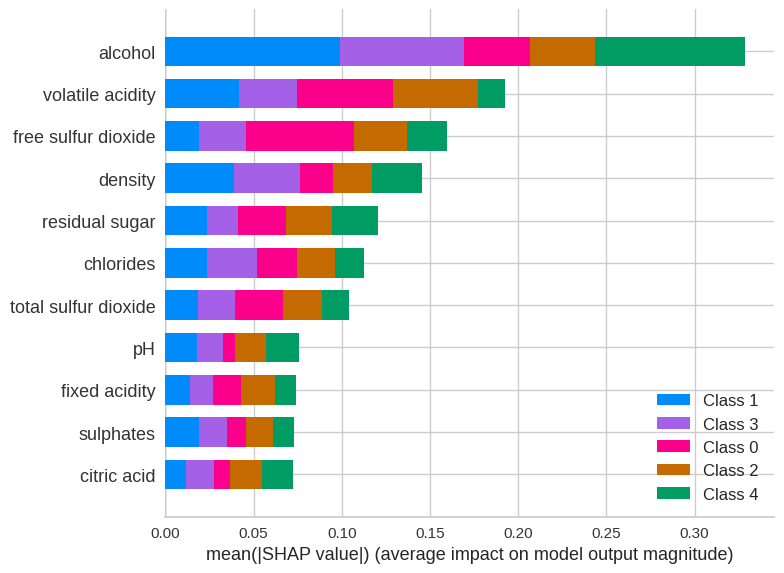

In [29]:
# interpret summary model
interpret_model(tuned_rf, plot = 'summary')

In [30]:
# reason plot for test set observation 1
interpret_model(tuned_rf, plot = 'reason', observation = 1)

## Save model

In [32]:
# save pipeline
save_model(tuned_rf, 'pycaret_pipeline_white_wine_classification4')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['fixed acidity',
                                              'volatile acidity', 'citric acid',
                                              'residual sugar', 'chlorides',
                                              'free sulfur dioxide',
                                              'total sulfur dioxide', 'density',
                                              'pH', 'sulphates...
                  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                         class_weight=None, criterion='gini',
                                         max_depth=None, max_features='sqrt',
               